<a href="https://colab.research.google.com/github/zaephaer/AutoML/blob/main/ml_project_1_heartfailure_autosklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#loading dataset directly from Google Drive
url = 'https://drive.google.com/file/d/1lYqh0DOoQfLjYmFlL8efXv6aZeBuBKOr/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


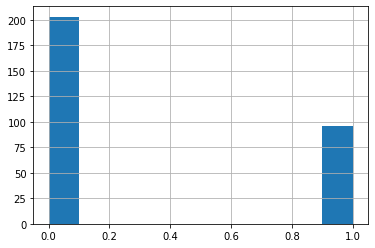

In [ ]:
# Creating bar like this will aloow us to see, wether data is inbalance or not, 
# which might resulted of overfitting (where data will be train more on larger amount of classification)
df['DEATH_EVENT'].hist()

In [ ]:
# Using resample method to balance datase
from sklearn.utils import resample

# Temporary created divided class dataset
safe = df[df["DEATH_EVENT"] == 0]
unsafe = df[df["DEATH_EVENT"] == 1]

# Created temp df with both class, with same amount of data
upsampled = resample(unsafe, replace=True, n_samples=len(safe), random_state=33)

# Concat
upsampled = pd.concat([safe, upsampled])

# Check new balance class
upsampled["DEATH_EVENT"].value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

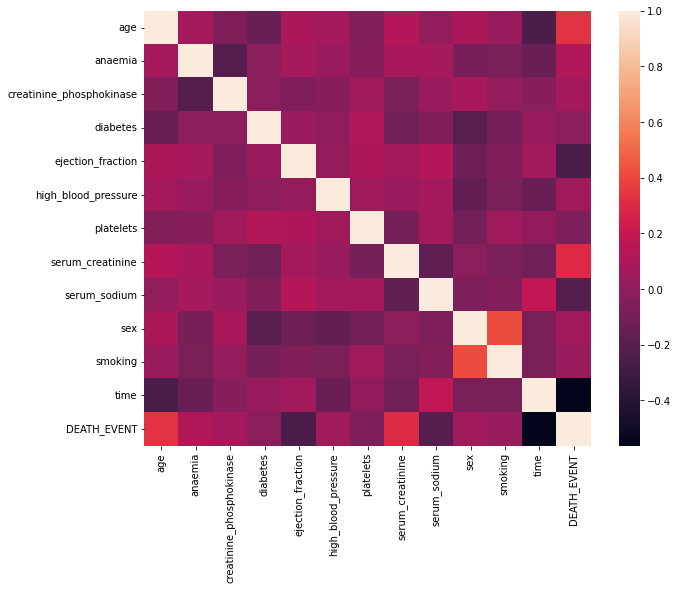

In [ ]:
# Examine correlation
plt.figure(figsize=(10,8))
sns.heatmap(upsampled.corr())

In [ ]:
# Correlation of Target with Feature - Ranked
upsampled.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
age                         0.331503
serum_creatinine            0.297579
anaemia                     0.113571
creatinine_phosphokinase    0.076373
sex                         0.057955
high_blood_pressure         0.056721
smoking                     0.026046
diabetes                   -0.025074
platelets                  -0.065179
serum_sodium               -0.209523
ejection_fraction          -0.250227
time                       -0.562484
Name: DEATH_EVENT, dtype: float64

In [ ]:
# Splitting dataset
X = upsampled.drop(["DEATH_EVENT"],axis=1)
y = upsampled["DEATH_EVENT"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

print(f'X Training Shape:',X_train.shape)
print(f'y Training Shape:',y_train.shape)
print('***************************')
print(f'X Testing Shape y:',X_test.shape)
print(f'y Testing Shape y:',y_test.shape)

X Training Shape: (324, 12)
y Training Shape: (324,)
***************************
X Testing Shape y: (82, 12)
y Testing Shape y: (82,)


In [ ]:
pip install auto-sklearn

In [ ]:
# Call auto-sklearn library - Classification
from autosklearn.classification import AutoSklearnClassifier

# Model (with time setting)
clf = AutoSklearnClassifier(time_left_for_this_task=300, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)

# Init training
clf.fit(X_train, y_train)

# Model Training score
print('Model Training Score :', clf.score(X_train, y_train))

# Model Training score
print('Model Test Score     :', clf.score(X_test, y_test))

Model Training Score : 0.9814814814814815
Model Test Score     : 0.9024390243902439


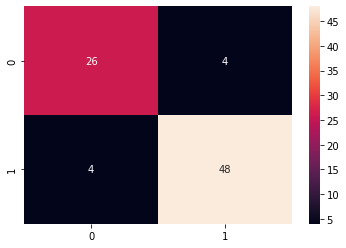

In [ ]:
# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True)

In [ ]:
#Performance Measures
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

accuracy  = round((tp + tn) / total,4)     # Accuracy Rate
precision = round(tp / (tp + fp), 4)       # Positive Predictive Value
recall    = round(tp / (tp + fn), 4)       # True Positive Rate
f1score  = round(2 * precision * recall / (precision + recall), 4)

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')

Accuracy    : 0.9024
Precision   : 0.9231
Recall      : 0.9231
F1 score    : 0.9231


In [ ]:
#input = (55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6)      # Row[1] - Death = 1
input = (45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278)  # Row[296] - Death = 0
input_array = np.asarray(input)
input_reshaped = input_array.reshape(1,-1)

predict = clf.predict(input_reshaped)
print('Predicted Class: %d' % predict[0])

Predicted Class: 0
